### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

In [176]:
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [ ]:
# Подключение модуля для работы с файлами
import os
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотеки для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение функции для разделения данных на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение функции для преобразования меток классов в категориальное представление
from tensorflow.keras.utils import to_categorical

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_light.zip

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train_org.shape)
print('Размер массива y_train', y_train_org.shape)

Размер массива x_train (302, 20, 20, 1)
Размер массива y_train (302,)


In [ ]:
accuracy_lin = dict()
accuracy_re = dict()

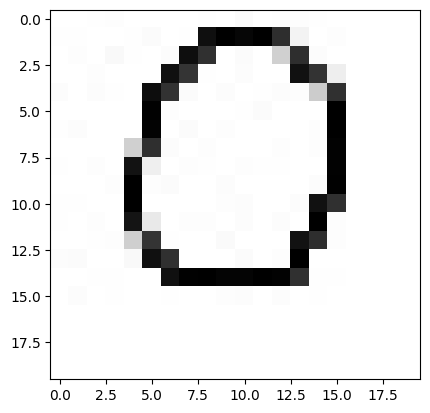

In [ ]:
# Номер картинки
n = 214

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
# Разделение данных на обучающий и тестовый наборы
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train.shape} -> {x_train_org.shape}')
print(f'Форма  тестовых данных: {x_test.shape} ')

Форма обучающих данных: (241, 400) -> (241, 20, 20, 1)
Форма  тестовых данных: (61, 400) 


In [ ]:
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
CLASS_COUNT = 3
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [ ]:
print(y_train.shape)
print(y_train[0])

(241, 3)
[0. 0. 1.]


In [ ]:
model1 = Sequential()
model2 = Sequential()

In [ ]:
model1.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(10, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

In [ ]:
model2.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model1.summary())
print(model2.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 32)                12832     
                                                                 
 dense_105 (Dense)           (None, 15)                495       
                                                                 
 dense_106 (Dense)           (None, 10)                160       
                                                                 
 dense_107 (Dense)           (None, 3)                 33        
                                                                 
Total params: 13520 (52.81 KB)
Trainable params: 13520 (52.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              

In [ ]:
history1 = model1.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 1.0334 - accuracy: 0.5560 - val_loss: 0.8712 - val_accuracy: 0.5902
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.7680 - accuracy: 0.7054 - val_loss: 0.7473 - val_accuracy: 0.7213
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.7344 - val_loss: 0.7369 - val_accuracy: 0.7049
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6359 - accuracy: 0.7261 - val_loss: 0.7072 - val_accuracy: 0.6721
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5268 - accuracy: 0.7967 - val_loss: 0.6996 - val_accuracy: 0.7377
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4994 - accuracy: 0.8008 - val_loss: 0.6679 - val_accuracy: 0.7377
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4538 - accuracy: 0.8382 - val_loss: 0.6679 - val_accuracy: 0.7541
Epoch 8/10
25/25 [=

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 1.0645 - accuracy: 0.4108 - val_loss: 0.9536 - val_accuracy: 0.5738
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9264 - accuracy: 0.5685 - val_loss: 0.8740 - val_accuracy: 0.6721
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.8287 - accuracy: 0.6805 - val_loss: 0.7865 - val_accuracy: 0.6557
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.7593 - val_loss: 0.7787 - val_accuracy: 0.6721
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.7967 - val_loss: 0.7119 - val_accuracy: 0.6885
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5083 - accuracy: 0.8257 - val_loss: 0.6732 - val_accuracy: 0.6721
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4373 - accuracy: 0.8382 - val_loss: 0.8341 - val_accuracy: 0.6230
Epoch 8/10
25/25 [=

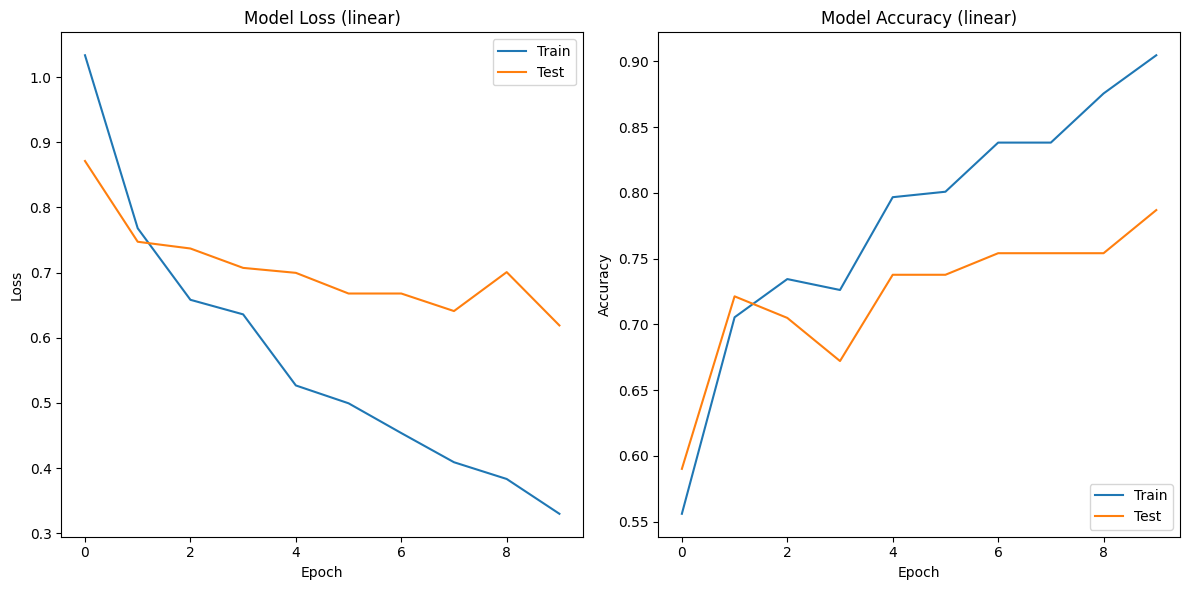

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history1.history['loss'])
axes[0].plot(history1.history['val_loss'])
axes[0].set_title('Model Loss (linear)')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1].plot(history1.history['accuracy'])
axes[1].plot(history1.history['val_accuracy'])
axes[1].set_title('Model Accuracy (linear)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

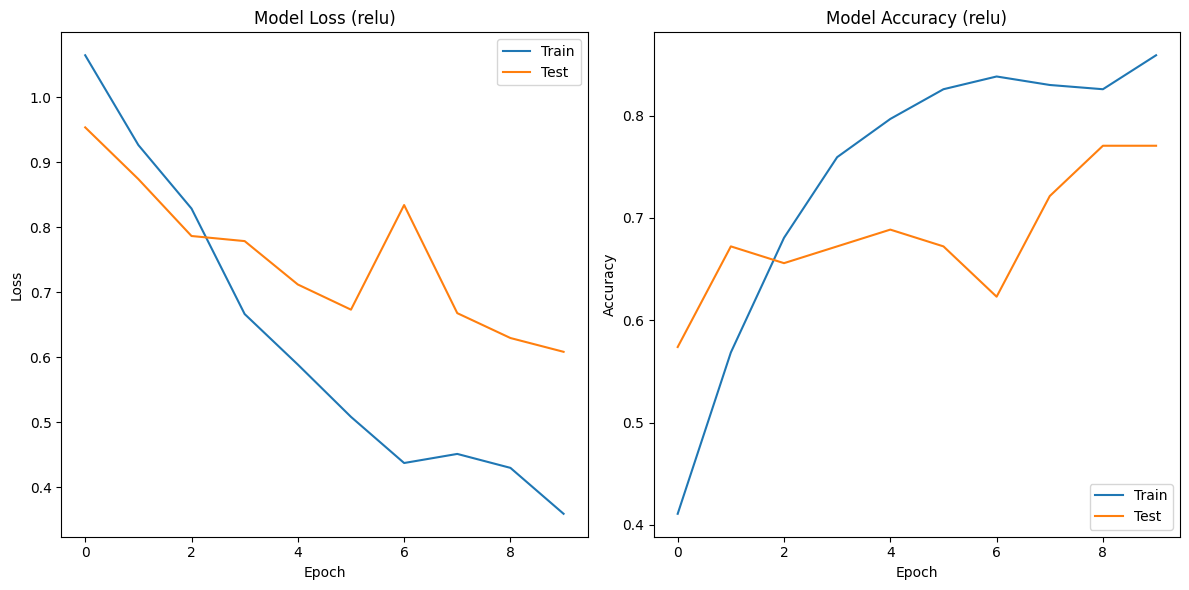

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history2.history['loss'])
axes[0].plot(history2.history['val_loss'])
axes[0].set_title('Model Loss (relu)')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1].plot(history2.history['accuracy'])
axes[1].plot(history2.history['val_accuracy'])
axes[1].set_title('Model Accuracy (relu)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

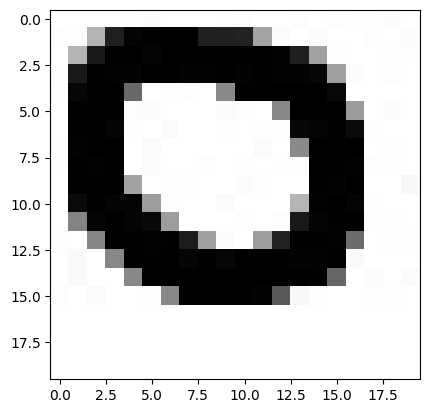

In [ ]:
# Установка начального значения для генератора случайных чисел
np.random.seed(485)

# Номер тестовой фигуры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(400,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 400)


In [ ]:
prediction1 = model1.predict(x)

1/1 [==============================] - 0s 59ms/step


In [ ]:
prediction2 = model2.predict(x)

1/1 [==============================] - 0s 57ms/step


In [ ]:
# Вывод результата
print(prediction1)
print(prediction2)

[[0.46186963 0.13352633 0.4046041 ]]
[[0.37957746 0.13201922 0.4884033 ]]


In [ ]:
# Получение и вывод индекса самого большого элемента
pred = np.argmax(prediction2)
print(f'Распознана цифра: {pred}')

Распознана цифра: 2


In [ ]:
print(y_test_org[n_rec])

0


In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

2/2 [==============================] - 0s 7ms/step - loss: 0.6189 - accuracy: 0.7869
Model 1 - Test Accuracy: 0.7868852615356445
2/2 [==============================] - 0s 8ms/step - loss: 0.6084 - accuracy: 0.7705
Model 2 - Test Accuracy: 0.7704917788505554


In [ ]:
accuracy_lin['n10_batch10'] = accuracy1
accuracy_re['n10_batch10'] = accuracy2

In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(100, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(5, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(100, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=10, epochs=10, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=10, epochs=10, verbose=0, validation_data=(x_test, y_test))

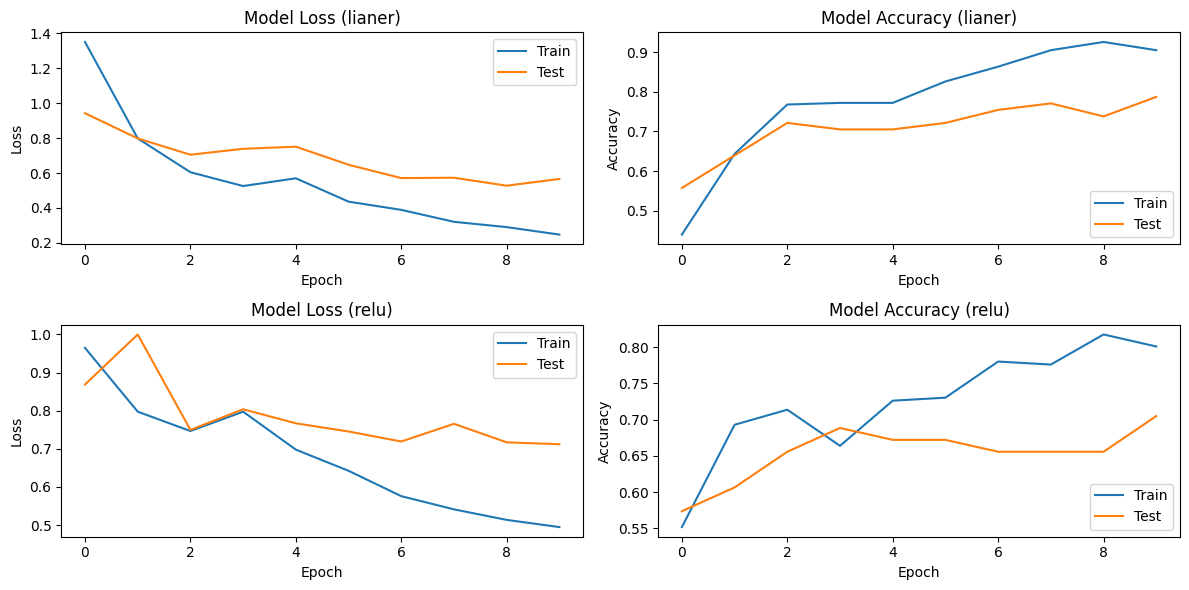

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

2/2 [==============================] - 0s 6ms/step - loss: 0.5664 - accuracy: 0.7869
Model 1 - Test Accuracy: 0.7868852615356445
2/2 [==============================] - 0s 6ms/step - loss: 0.7120 - accuracy: 0.7049
Model 2 - Test Accuracy: 0.7049180269241333


In [ ]:
accuracy_lin['n100_batch10'] = accuracy1
accuracy_re['n100_batch10'] = accuracy2

In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(5000, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(5, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(5000, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=10, epochs=10, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=10, epochs=10, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

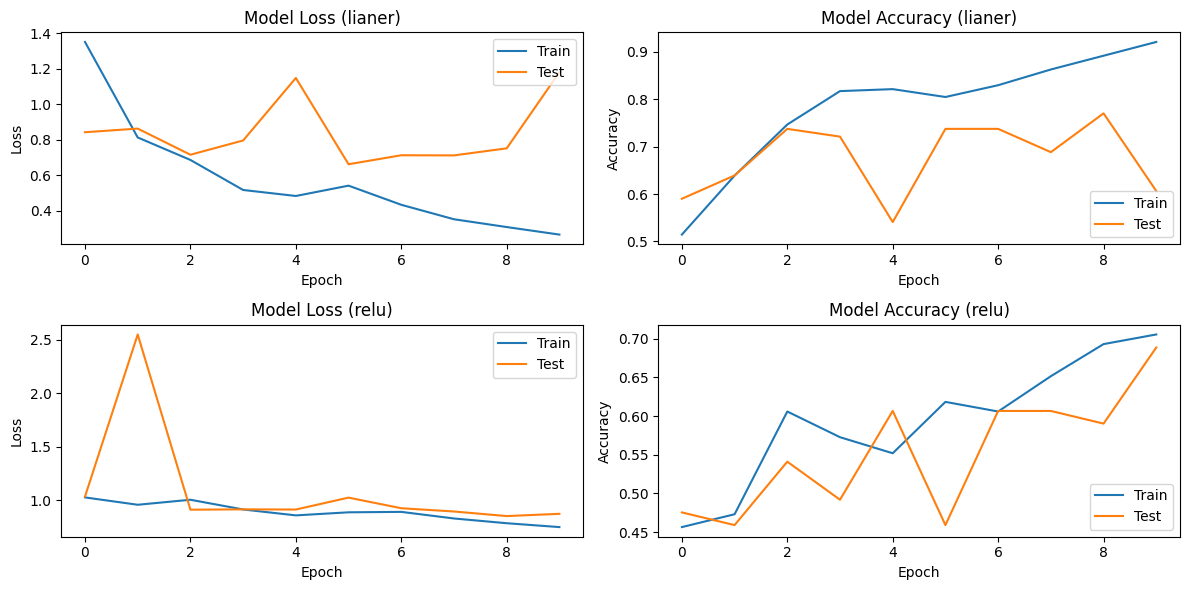

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n5000_batch10'] = accuracy1
accuracy_re['n5000_batch10'] = accuracy2

2/2 [==============================] - 0s 7ms/step - loss: 1.1798 - accuracy: 0.6066
Model 1 - Test Accuracy: 0.6065573692321777
2/2 [==============================] - 0s 6ms/step - loss: 0.8716 - accuracy: 0.6885
Model 2 - Test Accuracy: 0.688524603843689


In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(10, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=100, epochs=10, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=10, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

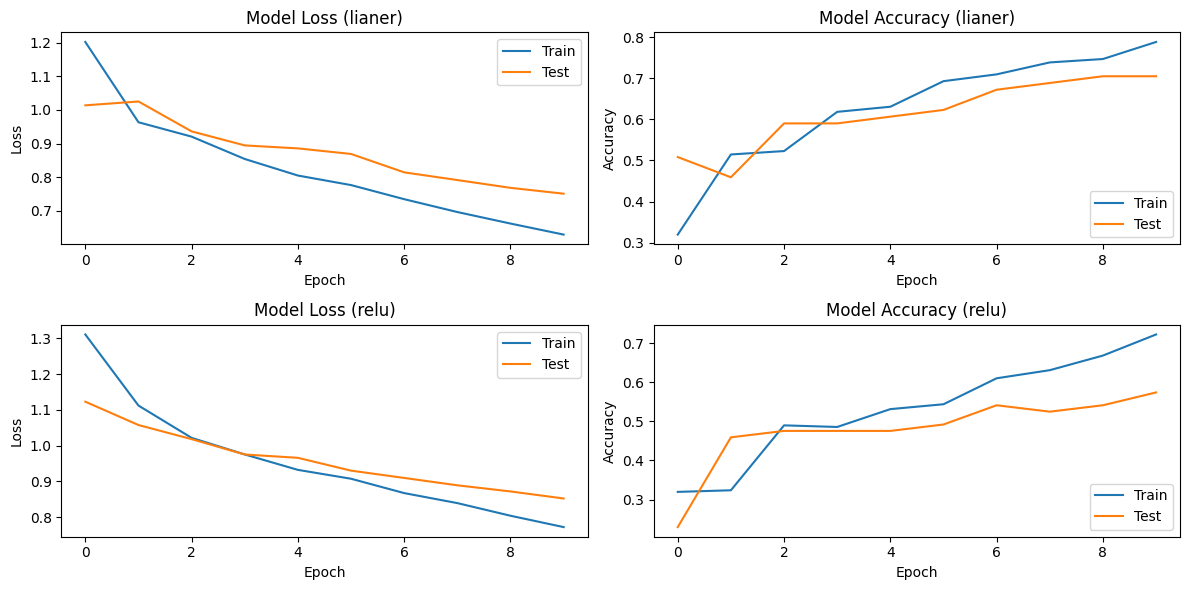

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n10_batch100'] = accuracy1
accuracy_re['n10_batch100'] = accuracy2

2/2 [==============================] - 0s 9ms/step - loss: 0.7508 - accuracy: 0.7049
Model 1 - Test Accuracy: 0.7049180269241333
2/2 [==============================] - 0s 7ms/step - loss: 0.8523 - accuracy: 0.5738
Model 2 - Test Accuracy: 0.5737704634666443


In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(100, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(5, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(100, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=100, epochs=15, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=15, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

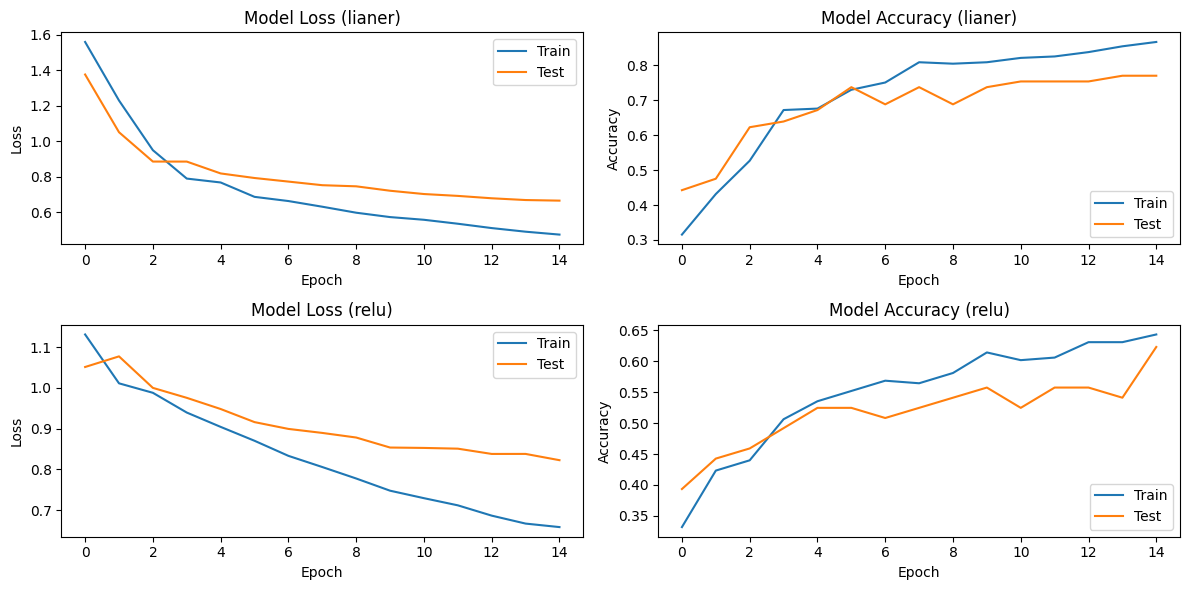

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n100_batch100'] = accuracy1
accuracy_re['n100_batch100'] = accuracy2

2/2 [==============================] - 0s 8ms/step - loss: 0.6646 - accuracy: 0.7705
Model 1 - Test Accuracy: 0.7704917788505554
2/2 [==============================] - 0s 7ms/step - loss: 0.8225 - accuracy: 0.6230
Model 2 - Test Accuracy: 0.6229507923126221


In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(5000, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(5, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(5000, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=100, epochs=15, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=15, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

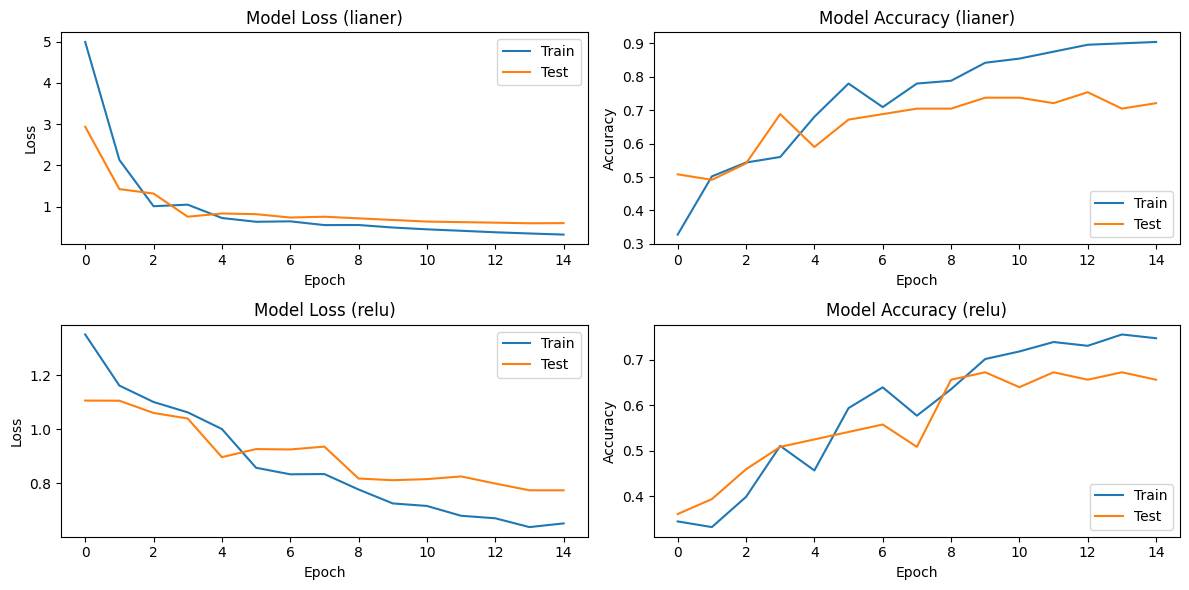

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n5000_batch100'] = accuracy1
accuracy_re['n5000_batch100'] = accuracy2

2/2 [==============================] - 0s 6ms/step - loss: 0.5982 - accuracy: 0.7213
Model 1 - Test Accuracy: 0.7213114500045776
2/2 [==============================] - 0s 6ms/step - loss: 0.7733 - accuracy: 0.6557
Model 2 - Test Accuracy: 0.6557376980781555


In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(5000, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(5, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(5000, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=1000, epochs=15, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=1000, epochs=15, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

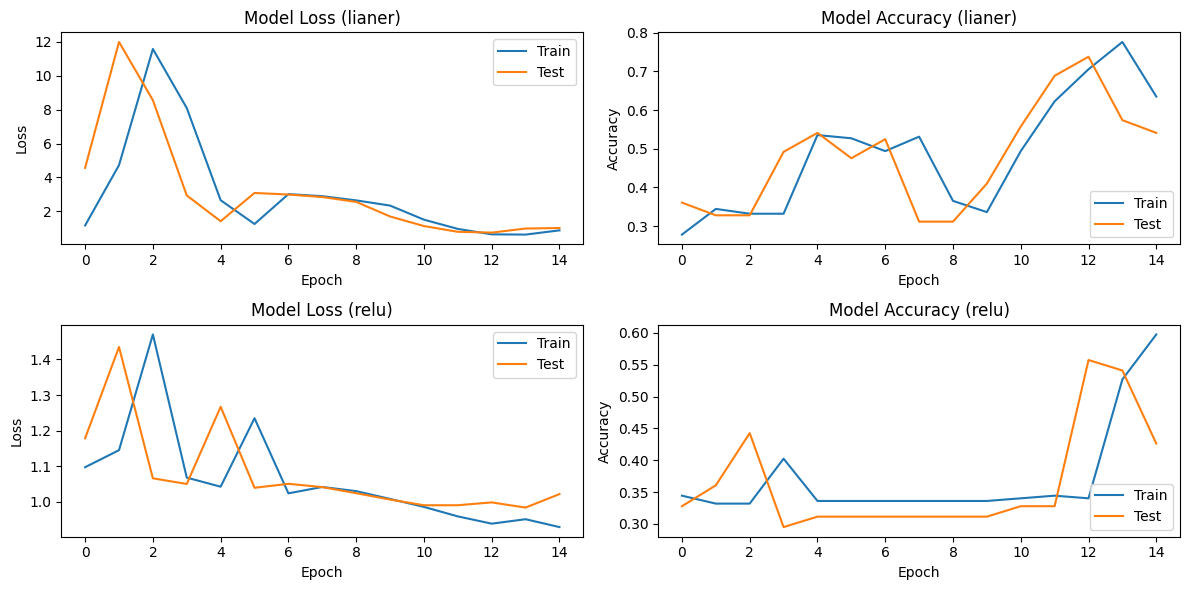

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n5000_batch1000'] = accuracy1
accuracy_re['n5000_batch1000'] = accuracy2

2/2 [==============================] - 0s 7ms/step - loss: 1.0110 - accuracy: 0.5410
Model 1 - Test Accuracy: 0.5409836173057556
2/2 [==============================] - 0s 8ms/step - loss: 1.0219 - accuracy: 0.4262
Model 2 - Test Accuracy: 0.4262295067310333


In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(100, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(5, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(100, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=1000, epochs=15, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=1000, epochs=15, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

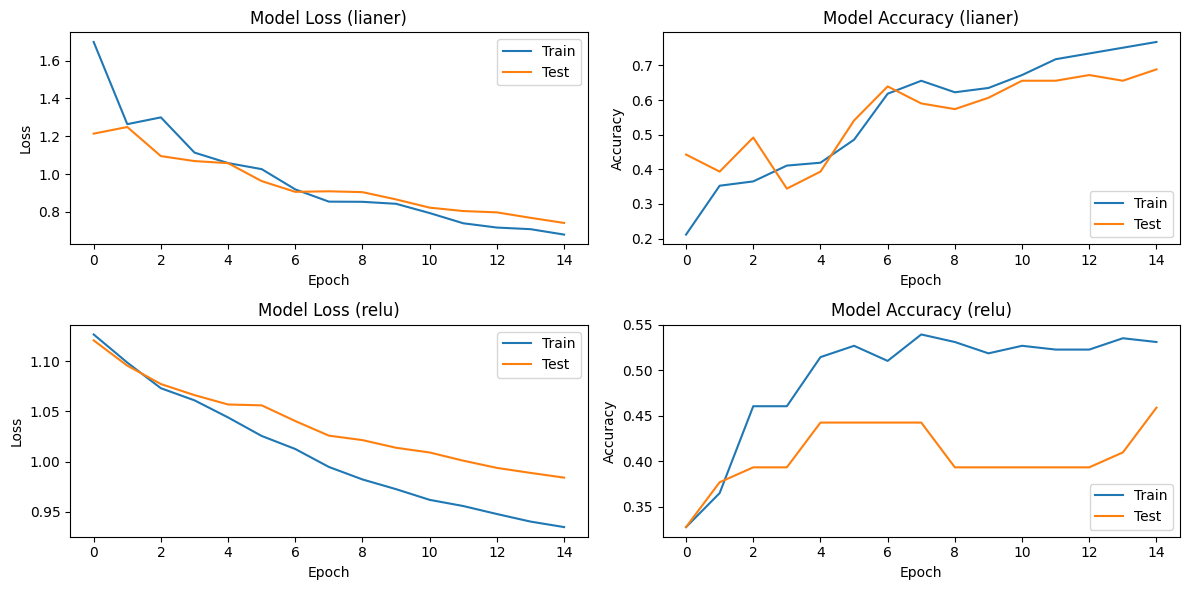

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n100_batch1000'] = accuracy1
accuracy_re['n100_batch1000'] = accuracy2

2/2 [==============================] - 0s 9ms/step - loss: 0.7419 - accuracy: 0.6885
Model 1 - Test Accuracy: 0.688524603843689
2/2 [==============================] - 0s 7ms/step - loss: 0.9839 - accuracy: 0.4590
Model 2 - Test Accuracy: 0.4590163826942444


In [ ]:
model1 = Sequential()
model2 = Sequential()

model1.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model1.add(Dense(15, activation='linear'))
model1.add(Dense(10, activation='linear'))
model1.add(Dense(3, activation='softmax')) # последний слой

model2.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model2.add(Dense(15, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(3, activation='softmax')) # последний слой, три варианта

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=1000, epochs=15, verbose=0, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, batch_size=1000, epochs=15, verbose=0, validation_data=(x_test, y_test))

model1.save_weights('model1.h5')
model1.load_weights('model1.h5')
model2.save_weights('model2.h5')
model2.load_weights('model2.h5')

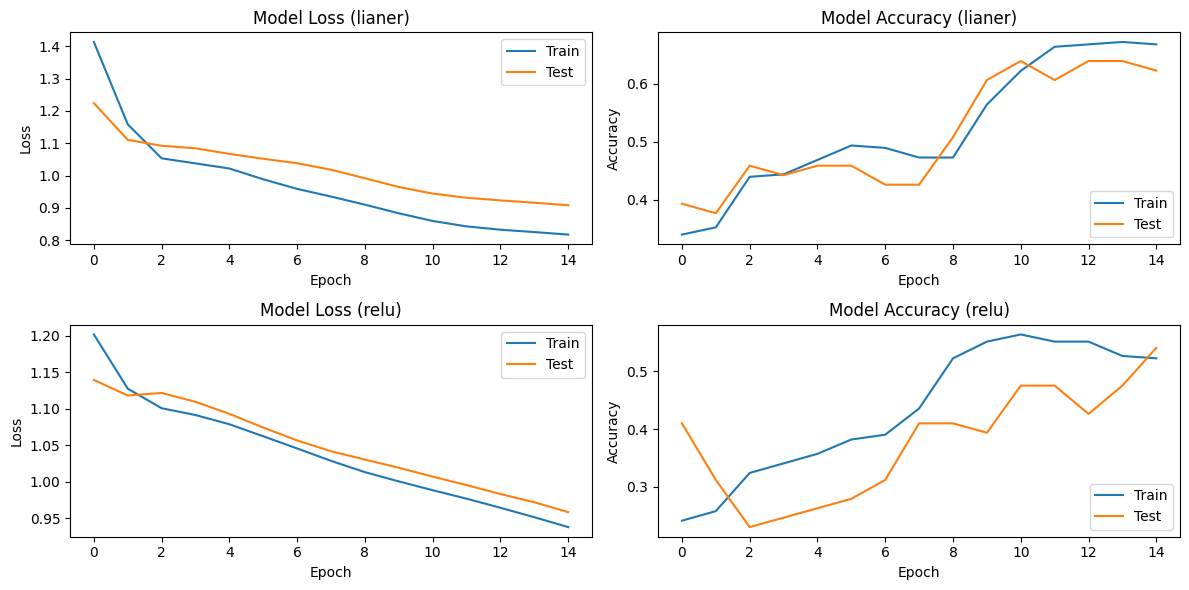

In [ ]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0, 0].plot(history1.history['loss'])
axes[0, 0].plot(history1.history['val_loss'])
axes[0, 0].set_title('Model Loss (lianer)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[0, 1].plot(history1.history['accuracy'])
axes[0, 1].plot(history1.history['val_accuracy'])
axes[0, 1].set_title('Model Accuracy (lianer)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(['Train', 'Test'], loc='lower right')

# График ошибки на обучающем и валидационном наборах данных
axes[1, 0].plot(history2.history['loss'])
axes[1, 0].plot(history2.history['val_loss'])
axes[1, 0].set_title('Model Loss (relu)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1, 1].plot(history2.history['accuracy'])
axes[1, 1].plot(history2.history['val_accuracy'])
axes[1, 1].set_title('Model Accuracy (relu)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy1)

loss2, accuracy2 = model2.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy2)

accuracy_lin['n10_batch1000'] = accuracy1
accuracy_re['n10_batch1000'] = accuracy2

2/2 [==============================] - 0s 6ms/step - loss: 0.9081 - accuracy: 0.6230
Model 1 - Test Accuracy: 0.6229507923126221
2/2 [==============================] - 0s 6ms/step - loss: 0.9586 - accuracy: 0.5410
Model 2 - Test Accuracy: 0.5409836173057556


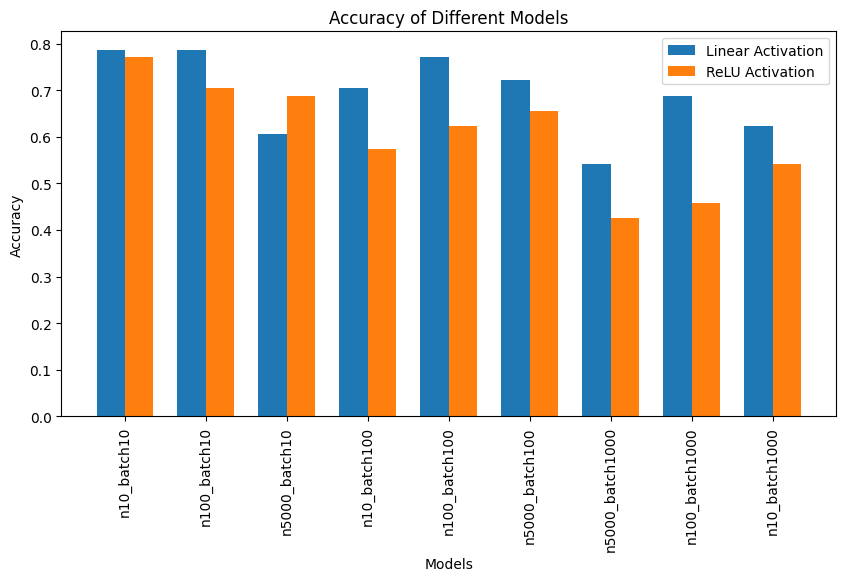

In [ ]:
# Получение ключей и значений из словаря accuracy_lin
labels_lin = list(accuracy_lin.keys())
values_lin = list(accuracy_lin.values())

# Получение ключей и значений из словаря accuracy_re
labels_re = list(accuracy_re.keys())
values_re = list(accuracy_re.values())

# Создание графика
plt.figure(figsize=(10, 5))

# Ширина столбцов
bar_width = 0.35

# Создание массива для оси x для модели с линейной активацией
x_lin = np.arange(len(labels_lin))

# Создание массива для оси x для модели с активацией ReLU с смещением
x_re = np.arange(len(labels_re)) + bar_width

# Построение столбцов для accuracy_lin
plt.bar(x_lin, values_lin, width=bar_width, label='Linear Activation')

# Построение столбцов для accuracy_re с смещением по оси x
plt.bar(x_re, values_re, width=bar_width, label='ReLU Activation')

# Добавление подписей осей и заголовка
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.legend()


# Поворот подписей на 90 градусов
plt.xticks(rotation=90)

# Установка меток на оси x для обеих моделей
plt.xticks(ticks=np.arange(len(labels_lin)) + bar_width / 2, labels=labels_lin)

# Отображение графика
plt.show()